Mount Drive and Set Folder Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
img_folder = "/content/drive/MyDrive/FDS/News"
filenames = os.listdir(img_folder)
print(f"Total images: {len(filenames)}")


Total images: 188


Basic Image Size EDA

In [ ]:
from PIL import Image
import numpy as np

widths, heights = [], []
for fname in filenames:
    img_path = os.path.join(img_folder, fname)
    try:
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
    except:
        print(f"Could not load {fname}")

print(f"Width: min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.2f}")
print(f"Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.2f}")


Width: min=1200, max=2560, mean=2146.98
Height: min=1575, max=4155, mean=2800.65


Aspect Ratio Distribution

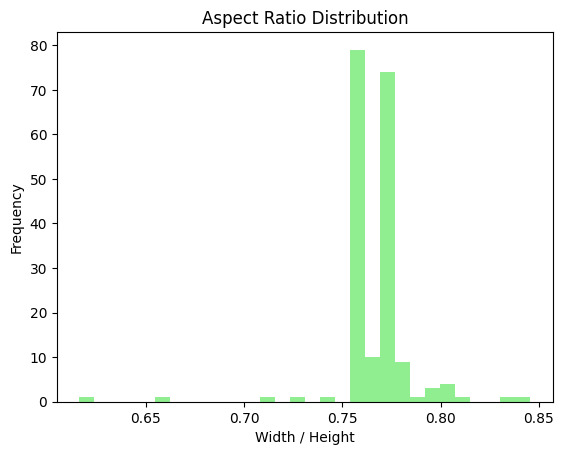

In [ ]:
import matplotlib.pyplot as plt

aspect_ratios = [w/h for w, h in zip(widths, heights)]
plt.hist(aspect_ratios, bins=30, color='lightgreen')
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Frequency")
plt.show()


Random Sample Images

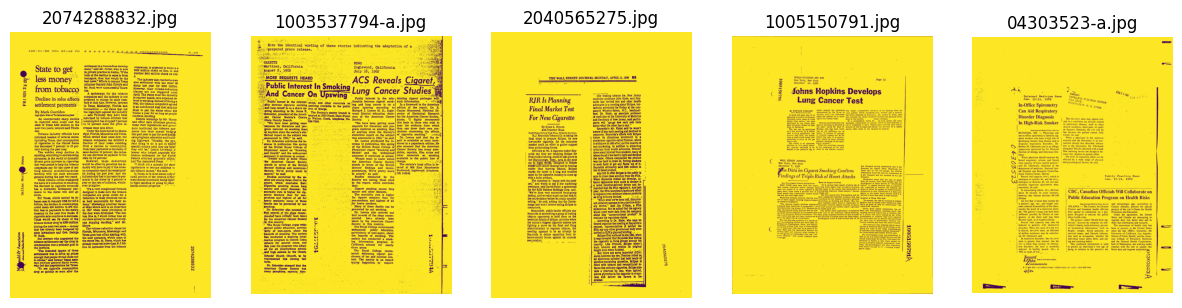

In [ ]:
import random

sample_imgs = random.sample(filenames, min(5, len(filenames)))
plt.figure(figsize=(15,5))
for i, fname in enumerate(sample_imgs):
    img_path = os.path.join(img_folder, fname)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
plt.show()


Pixel Value Distribution (Downsampled)

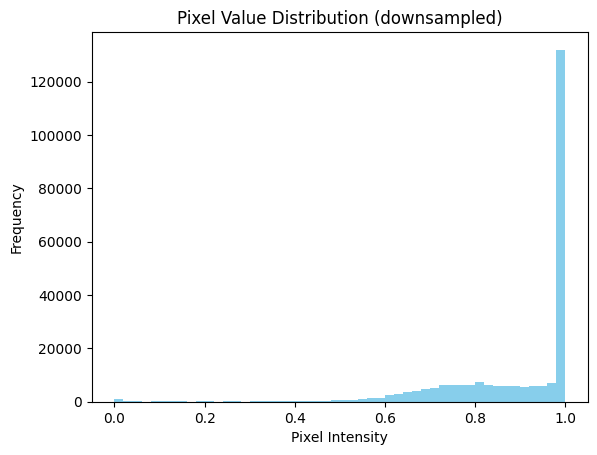

In [ ]:
all_pixels = []
for fname in filenames[:20]:  # use 20 images max
    img_path = os.path.join(img_folder, fname)
    img = Image.open(img_path).convert("RGB")
    img = img.resize((64, 64))  # downsample
    img_np = np.array(img) / 255.0
    all_pixels.extend(img_np.flatten())

plt.hist(all_pixels, bins=50, color='skyblue')
plt.title("Pixel Value Distribution (downsampled)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


File Types Count

In [ ]:
from collections import Counter
file_types = [fname.split('.')[-1].lower() for fname in filenames]
print("File types count:", Counter(file_types))


File types count: Counter({'jpg': 188})


Mean & Std per Channel (RGB)

In [ ]:
means, stds = [], []
for fname in filenames[:20]:  # sample 20 images to save memory
    img = Image.open(os.path.join(img_folder, fname)).convert("RGB")
    img_np = np.array(img) / 255.0
    means.append(img_np.mean(axis=(0,1)))  # per channel
    stds.append(img_np.std(axis=(0,1)))

means = np.array(means)
stds = np.array(stds)
print("Mean per channel (R,G,B):", means.mean(axis=0))
print("Std per channel (R,G,B):", stds.mean(axis=0))


Mean per channel (R,G,B): [0.89571538 0.89571538 0.89571538]
Std per channel (R,G,B): [0.29153554 0.29153554 0.29153554]


Detect Corrupted Images

In [ ]:
corrupt = []
for fname in filenames:
    try:
        img = Image.open(os.path.join(img_folder, fname))
        img.verify()
    except:
        corrupt.append(fname)
print(f"Corrupted images: {corrupt}")


Corrupted images: []


Preprocess Images for resnet/ViT

In [ ]:
import torch
from torchvision import transforms

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def preprocess_all_images(img_folder, transform):
    tensors = []
    filenames = os.listdir(img_folder)
    for fname in filenames:
        img_path = os.path.join(img_folder, fname)
        try:
            img = Image.open(img_path).convert("RGB")
            tensors.append(transform(img))
        except:
            print(f"Could not load {img_path}")
    return torch.stack(tensors), filenames

image_tensors, image_filenames = preprocess_all_images(img_folder, image_transform)
print(f"Processed {len(image_tensors)} images")
print(image_tensors.shape)  # (N, 3, 224, 224)


Processed 188 images
torch.Size([188, 3, 224, 224])
